In [40]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


data = arff.loadarff('dataset_31_credit-g.arff')
df= pd.DataFrame(data[0])
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)

In [44]:
chars = ['b',"'"]
for i in df.columns:
    for char in chars:
        if df[i].dtype == 'object':
            df[i] = df[i].str.replace(char,'')

In [45]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,ad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,ad


In [46]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [47]:
df['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='count'>

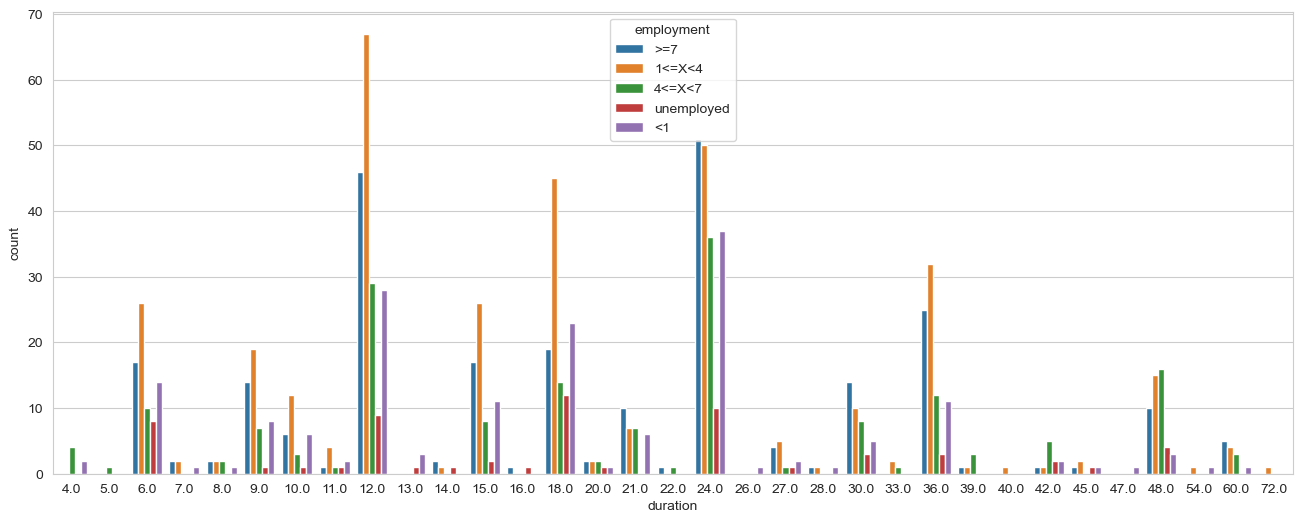

In [48]:
fig, ax=plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot(x='duration',data=df,hue='employment')


<AxesSubplot:xlabel='age', ylabel='count'>

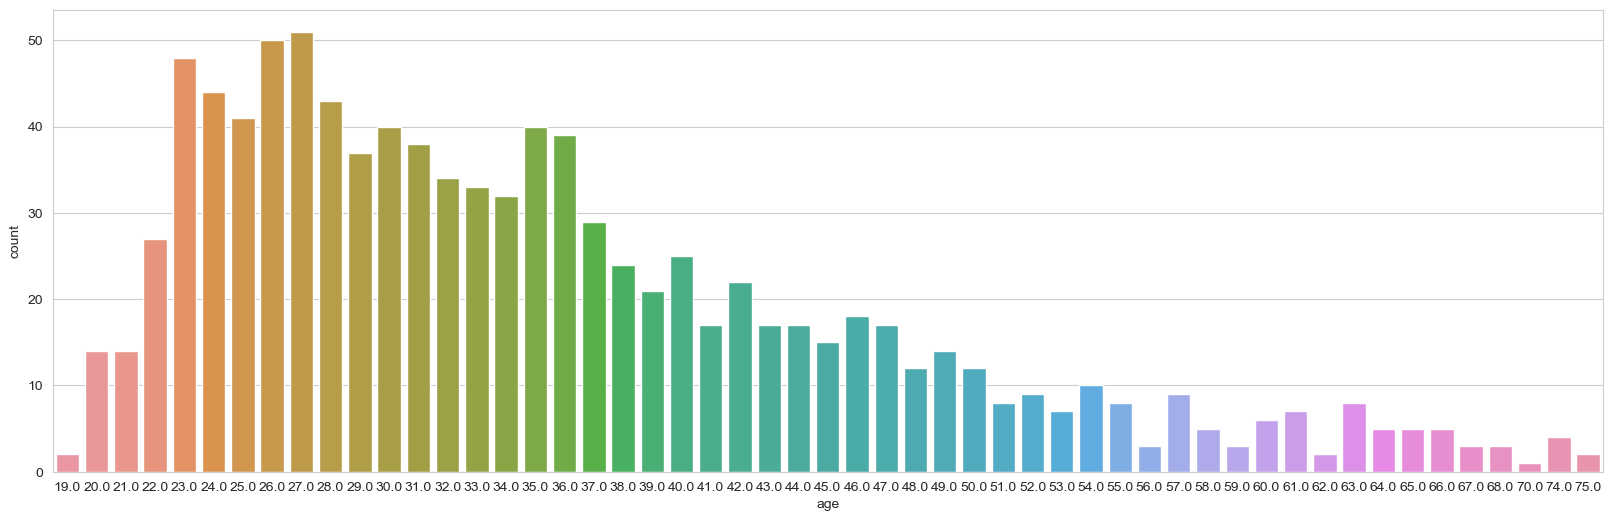

In [49]:
fig, ax=plt.subplots(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='age',data=df)

<AxesSubplot:xlabel='purpose', ylabel='count'>

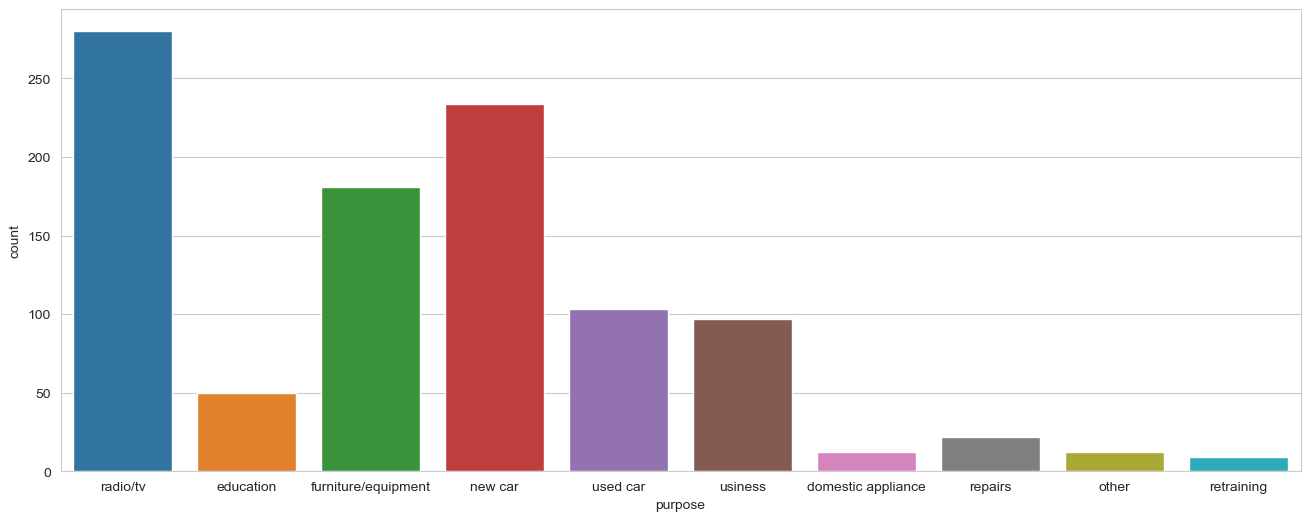

In [50]:
fig, ax=plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=df)

<AxesSubplot:xlabel='employment', ylabel='credit_amount'>

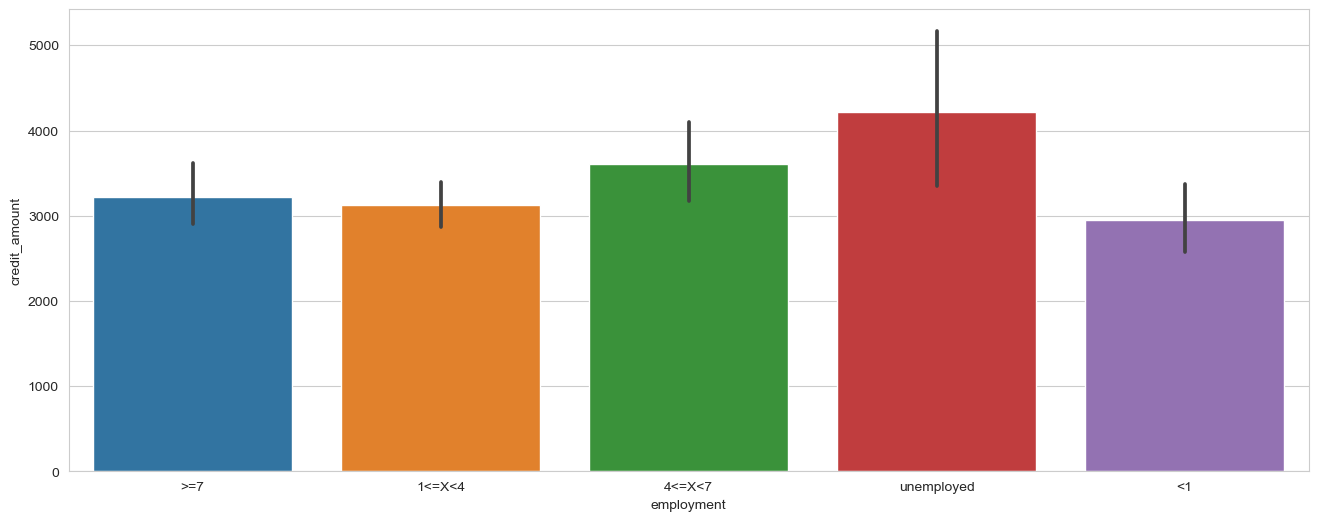

In [51]:
fig, ax=plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.barplot(x='employment',y='credit_amount',data=df)

<AxesSubplot:xlabel='employment', ylabel='count'>

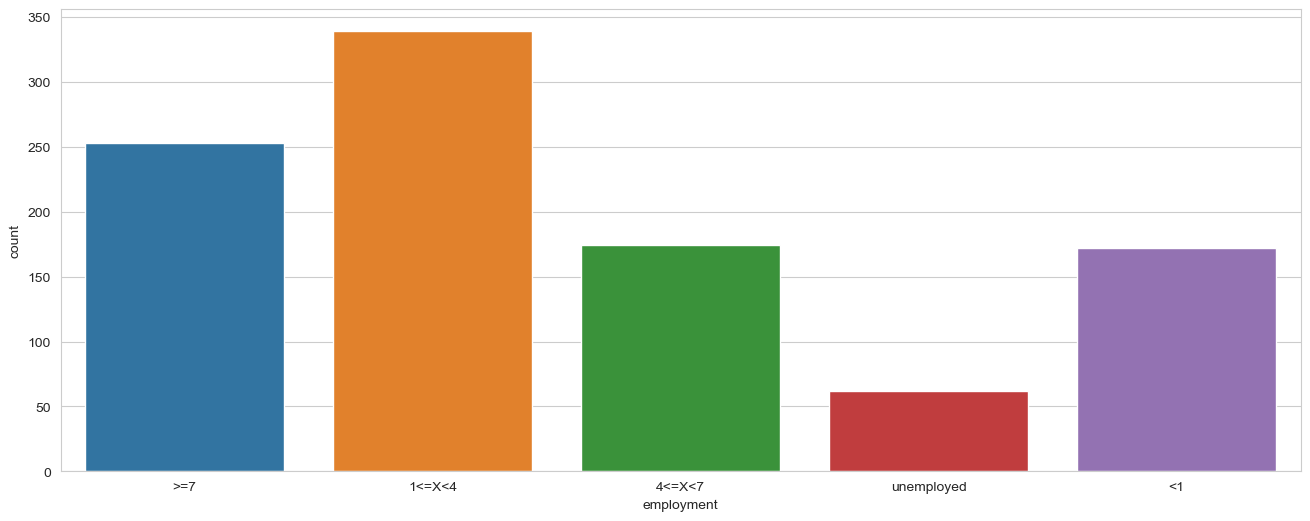

In [52]:
fig, ax=plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot(x='employment',data=df)

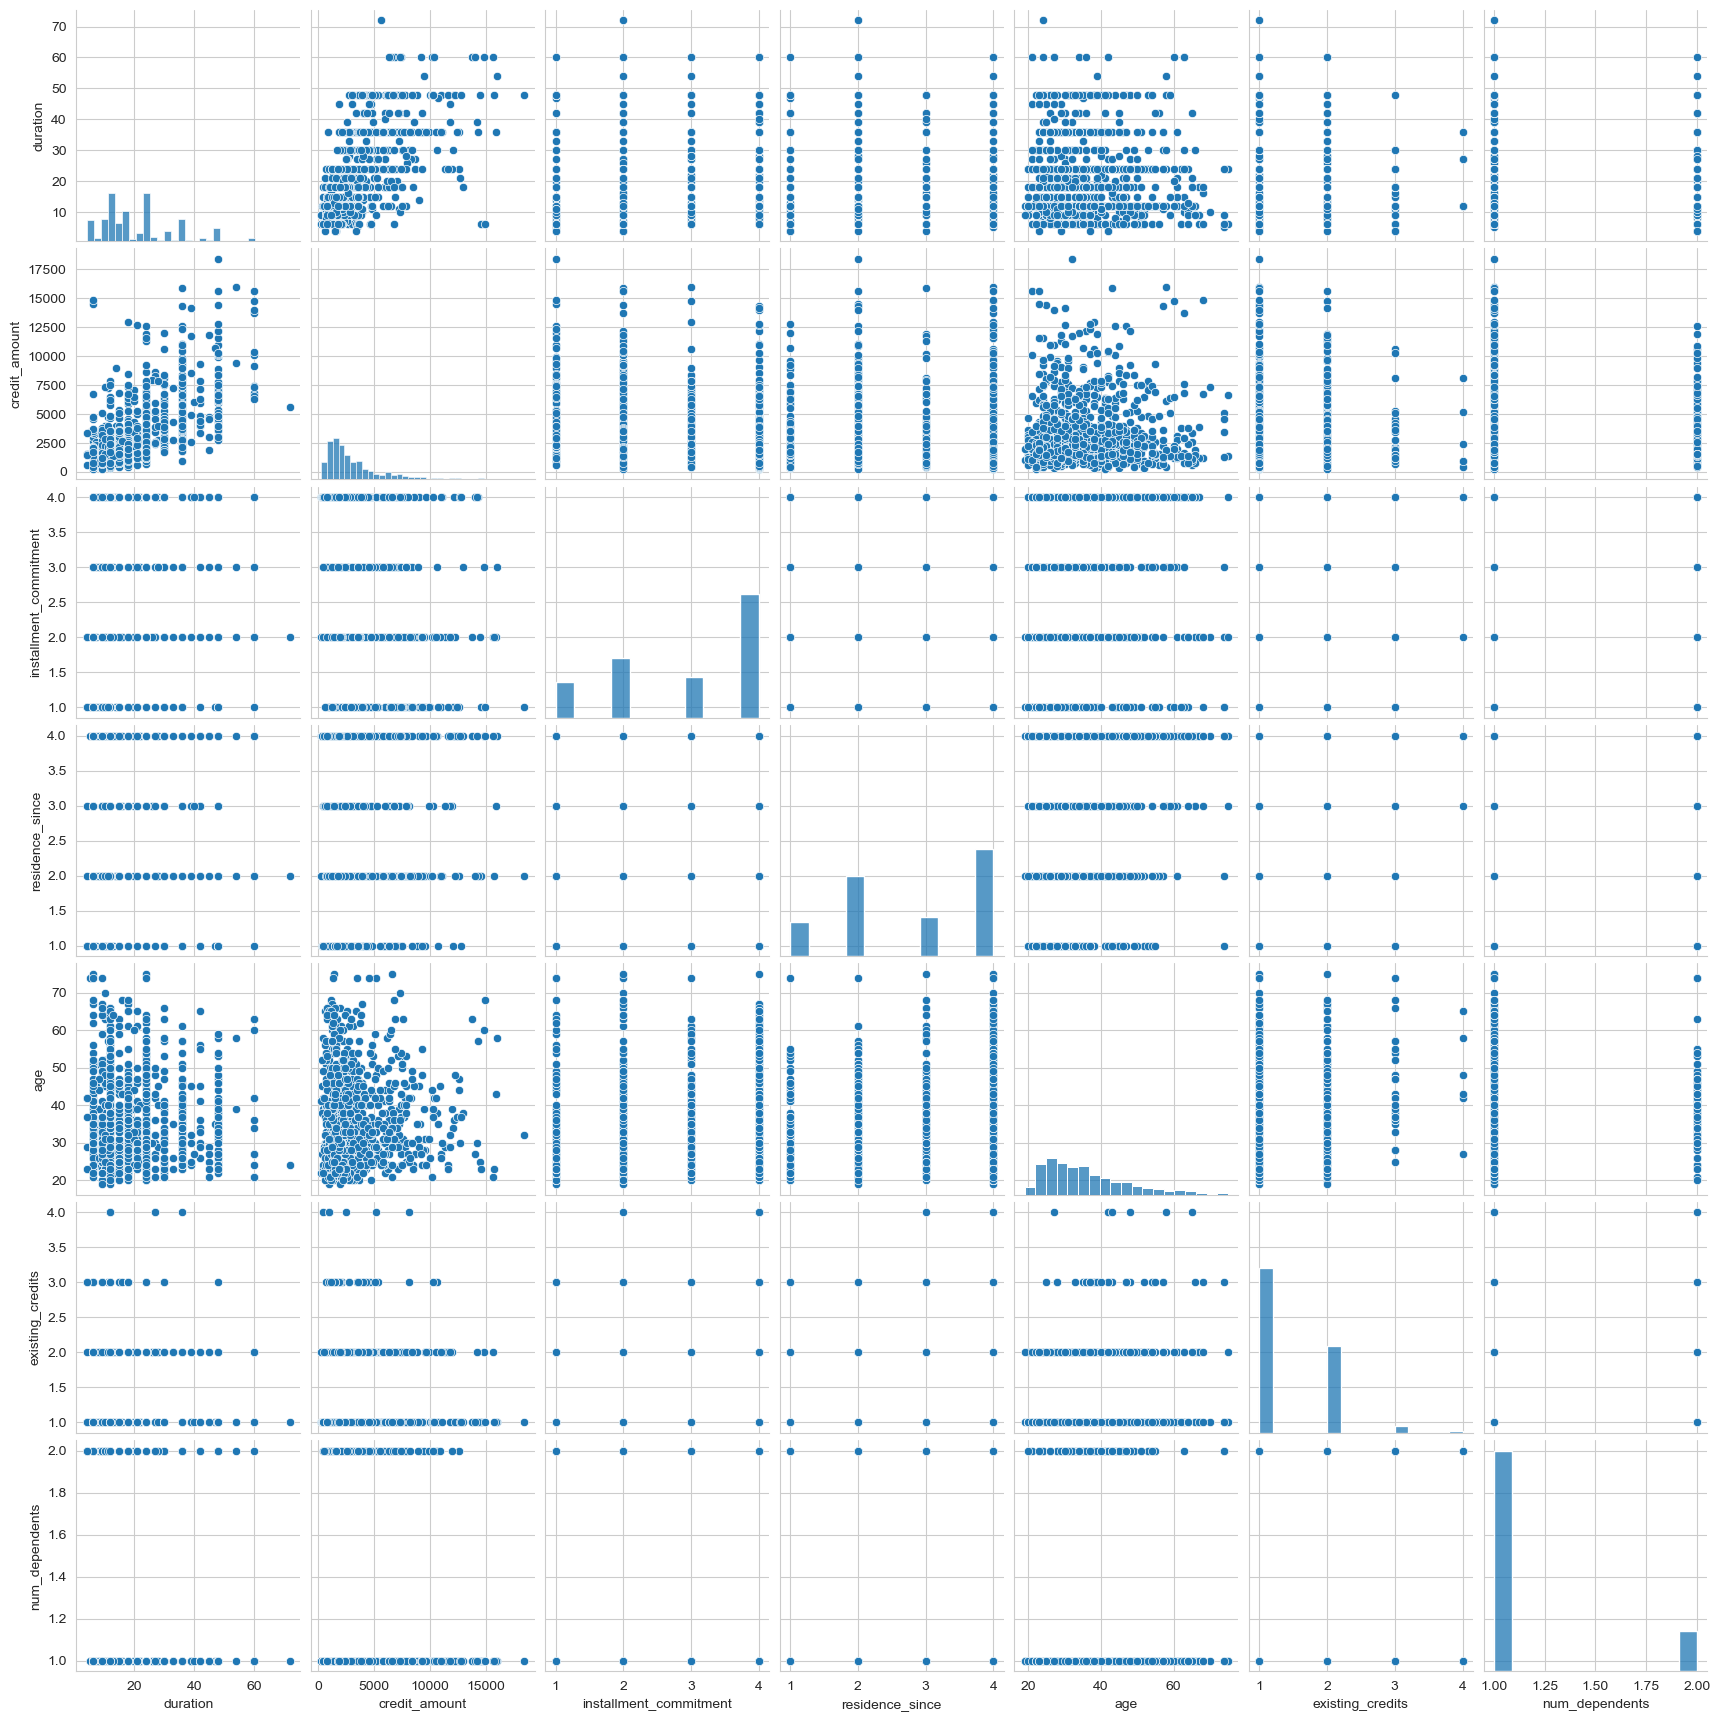

In [53]:
sns.pairplot(df)

In [54]:
df['class']=df['class'].str.replace('ad','bad')

In [55]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [56]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
X.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,1,1,0,1,0,1,0,0,1,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [57]:
df['class']=np.where(df['class']=='good',1,0)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,df['class'],test_size=0.2,random_state=9)

In [59]:
scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)

In [61]:
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
model = RandomForestClassifier()

In [65]:
params = {'n_estimators':np.arange(1,121,1),'max_depth':np.arange(1,15,1)}

In [66]:
rand_cv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,random_state=9,scoring='accuracy')

In [67]:
rand_cv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])},
                   random_state=9, scoring='accuracy')

In [68]:
rand_cv.best_params_

{'n_estimators': 70, 'max_depth': 10}

In [70]:
random_model = RandomForestClassifier(n_estimators=70,max_depth=10,random_state=9)

In [71]:
random_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, n_estimators=70, random_state=9)

In [72]:
pred = random_model.predict(X_test_scaled)

In [74]:
random_model.score(X_test_scaled,y_test)

0.805

In [76]:
from sklearn.metrics import mean_squared_error

In [82]:
mse = mean_squared_error(y_test,pred)
mse

0.195

In [83]:
rmse = np.sqrt(mse)
rmse

0.44158804331639234

In [84]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_reg.score(X_test_scaled,y_test)
pred = log_reg.predict(X_test_scaled)
log_reg

0.77